# 정말 간단한 EDA

## 데이터 불러오기 및 패키지 설치

In [28]:
import numpy as np
import pandas as pd

import os
import random

import warnings

warnings.filterwarnings(action='ignore')

path = '/opt/ml/input/data/' # 환경에 맞게 바꿔주시면 됩니다.

train = pd.read_csv(path + 'train_data.csv')
test = pd.read_csv(path + 'test_data.csv')

print(len(set(train['userID'].unique()) - set(test['userID'].unique())))
print(len(set(train['userID'].unique())))

6698
6698


train과 test 간 같은 유저가 존재하지 않습니다. test는 train에 없는 유저를 추측해야하죠.

## Timestamp 변수 살펴보기

In [29]:
# datetime 자료형으로 변환하면 날짜 변수를 훨씬 쉽게 접근할 수 있습니다.
train['Timestamp'] = pd.to_datetime(train['Timestamp'])
# train['Timestamp'].dt.year # 연도 정보
# train['Timestamp'].dt.month # 월 정보
# train['Timestamp'].dt.day # 일 정보
# train['Timestamp'].dt.hour # 시간 정보
# train['Timestamp'].dt.minute # 분 정보
# train['Timestamp'].dt.second # 초 정보
train['year'] = train['Timestamp'].dt.year
train['year'].value_counts()

2020    2266567
2019         19
Name: year, dtype: int64

In [30]:
train['month'] = train['Timestamp'].dt.month
train.groupby('month')['answerCode'].mean().sort_values()

month
12    0.496304
11    0.505544
5     0.643317
4     0.649545
6     0.651967
8     0.657599
7     0.665650
9     0.668872
10    0.670372
3     0.682643
2     0.687222
1     0.712199
Name: answerCode, dtype: float64

신기하게도 월별로 정답률에 차이가 있습니다. 12월에는 수능등이 끝난 상태여서 그럴까요.

지금 다루진 않았지만 날짜 변수를 더 잘 활용할 수 있을 것 같습니다. 

# assessmentItemID 변수 관찰하기.

In [31]:
for i in range(3):
    print(f'{i}번째 value_count')
    print(train['assessmentItemID'].str[i].value_counts())
    print('') 

0번째 value_count
A    2266586
Name: assessmentItemID, dtype: int64

1번째 value_count
0    2266586
Name: assessmentItemID, dtype: int64

2번째 value_count
7    279164
5    275773
3    273762
1    272082
2    268327
4    267323
6    264434
8    246336
9    119385
Name: assessmentItemID, dtype: int64



assessmentItemID 변수 2번째 값이 어느정도 의미가 있는 것 같아요.

자세히 살펴볼까요?

In [32]:
train['category_2'] = train['assessmentItemID'].str[2]

tem = train.groupby('category_2')['answerCode']

pd.DataFrame({'mean' : tem.mean(), 'cnt':tem.count()}).reset_index()

,category_2,mean,cnt
0,1,0.800876,272082
1,2,0.737593,268327
2,3,0.702238,273762
3,4,0.684056,267323
4,5,0.658208,275773
5,6,0.709232,264434
6,7,0.521876,279164
7,8,0.502598,246336
8,9,0.449948,119385


카테고리별로 정답률과 개수를 뽑아냈습니다. 이 변수는 문제 난이도라고 생각할 수도 있겠습니다.(4~5번은 조금 다름)

In [33]:
train['test_paper'] = train['assessmentItemID'].str[4:7]
train.groupby('test_paper')['answerCode'].mean().sort_values()

test_paper
057    0.529107
047    0.542518
049    0.550103
051    0.557857
069    0.558188
         ...   
179    0.819098
185    0.831546
195    0.835409
198    0.853838
196    0.895706
Name: answerCode, Length: 198, dtype: float64

시험지 별로(미션EDA 참고) 정답률을 비교해보았습니다. 꽤 많이 차이가 나는 것으로 보입니다.

In [34]:
train['test_paper'].value_counts()

017    17739
009    17555
011    17029
003    16970
007    16826
       ...  
180     3767
197     2973
194     2596
196     1304
198      951
Name: test_paper, Length: 198, dtype: int64

시험지에는 최소 950문제에서 17000 이상에 문제까지 존재합니다.

시험지에 문제가 적은 케이스는 없어서 좋은 변수가 될 것 같습니다.

In [35]:
train['problem_id'] = train['assessmentItemID'].str[-3:]
tem = train.groupby('problem_id')['answerCode']

pd.DataFrame({'mean' : tem.mean(), 'cnt':tem.count()}).reset_index()

,problem_id,mean,cnt
0,001,0.749916,371755
1,002,0.720062,370972
2,003,0.687773,371640
3,004,0.663364,369705
4,005,0.599134,360607
5,006,0.555685,197772
6,007,0.515399,127121
7,008,0.457156,67150
8,009,0.481729,18417
9,010,0.527892,5342


생각보다 문제 번호에 따른 정답률 값이 달라지는 것을 알 수 있습니다.

일반적으로 5번까지는 앵간한 시험지에 있고 6번 이후는 없는 시험지도 보이네요. 최대 13번 문제까지 있습니다.

수능과 같이 문제 번호가 뒤로 갈수록 난이도가 점점 어려워 진다고 받아드리면 될 것 같아요.

In [36]:
train.groupby('KnowledgeTag')['answerCode'].mean().sort_values()

KnowledgeTag
8911     0.188940
10332    0.250000
9125     0.257009
10590    0.268139
5763     0.278027
           ...   
1580     0.941896
1582     0.949280
1577     0.950461
7224     0.955022
1878     0.977778
Name: answerCode, Length: 912, dtype: float64

문제 카테고리도 간단하게 살펴봤는데요. 몇 안되는 칼럼인 만큼 상당히 유의미한 정답률 차이를 보여주네요.

In [37]:
train['KnowledgeTag'].value_counts()

7597    12892
7600    10734
2010    10176
7621     9709
8127     9006
        ...  
5142       47
2871       46
4978       46
7125       45
2613       44
Name: KnowledgeTag, Length: 912, dtype: int64

카테고리 별 문제가 최소한 40개 이상은 됩니다. 따로 전처리하지 않아도 좋을 것 같아요.

## 유저 변수 확인

In [43]:
tem = train.groupby('userID')['answerCode']
tem = pd.DataFrame({'mean' : tem.mean(), 'cnt':tem.count()}).reset_index()
tem

,userID,mean,cnt
0,0,0.630872,745
1,1,0.853162,933
2,2,0.612319,276
3,5,0.795918,833
4,6,0.442997,921
...,...,...,...
6693,7436,0.466667,15
6694,7437,0.375000,16
6695,7438,0.750000,16
6696,7440,0.400000,15


<AxesSubplot: >

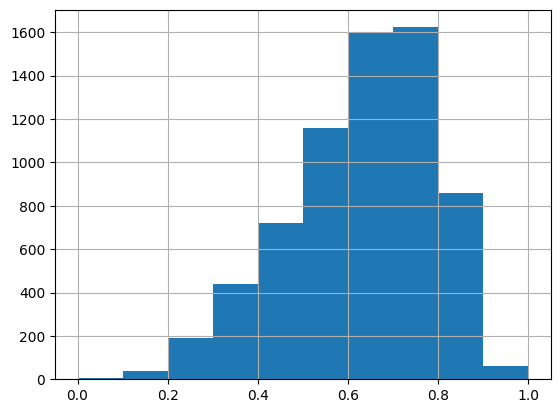

In [45]:
tem['mean'].hist()

사람별로 똑똑한 사람 조금 부족한(?) 사람이 있는 것을 확인했습니다.

한분 빼고는 사람 당 최소 15문제를 푼 것을 확인할 수 있습니다.

다만 테스트 데이터에는 아에 처음 본 유저만 있기 때문에 이 부분을 잘 고려해야겠습니다.